### PyImageJ Testing 
Testing PyImageJ's capabilities to do particle image processing

In [1]:
import imagej
from imagej import Mode
import cv2
import pandas as pd

Initializing ImageJ 

In [2]:
# initalize imagej
ij = imagej.init('net.imagej:imagej+net.imagej:imagej-legacy', mode=Mode.HEADLESS)

Opening Image

In [18]:
# macro command 
input_image = '/Users/sarah/Documents/areospace research/material recycling project/PyImageJ-Particle-Analysis/Particle Images/Ti64_Lot232-EZ2316_1Use_10X_Scale.png'
output_image = '/Users/sarah/Documents/areospace research/material recycling project/PyImageJ-Particle-Analysis/Processed Images/processed_img.png'
results_summary = '/Users/sarah/Documents/areospace research/material recycling project/PyImageJ-Particle-Analysis/Processed Results/results_summary.csv'

macro_cmd = f"""
// open image file 
open("{input_image}");
"""
ij.py.run_macro(macro_cmd)

mac = f"""// convert image to 8-bit image type
run("8-bit");

// set threshold for image and invert
setThreshold(70, 255);
run("Invert");"""

ij.py.run_macro(mac)


macro = f"""
// convert to a binary mask 
run("Convert to Mask");

// save preprocessed image
saveAs("png", "{output_image}");

// implement scale 
 run("Set Scale...", "distance=180 known=100 unit=um"); 

// set measurements
run("Set Measurements...", "area mean standard min centroid perimeter bounding box fit shape feret's integrated density median skewness kurtosis area_fraction stack position")

run("Analyze Particles...","size=0-Infinity exclude");

// save analyzed particle results to summary csv file
saveAs("Results", "{results_summary}");"""

ij.py.run_macro(macro)

plugin = "Afjustable Watershed"
args = {tolerance=1.0}

ij.py.run_plugin()



<java object 'org.scijava.script.ScriptModule'>

In [4]:
# macro command 
input_image = '/Users/sarah/Documents/areospace research/material recycling project/PyImageJ-Particle-Analysis/FlowCam/FlowCam_Export_Data/FlowCam-Images/2024-07-16 Roux_Virgin Ti64_R01/2024-07-16 Roux_Virgin Ti64_R01_00000.png'
output_image = '/Users/sarah/Documents/areospace research/material recycling project/PyImageJ-Particle-Analysis/FlowCam/FlowCam_Export_Data/FlowCam-Images/Processed Images/2024-07-16 Roux_Virgin Ti64_R01_00000_processedimage.png'
results_summary = '/Users/sarah/Documents/areospace research/material recycling project/PyImageJ-Particle-Analysis/FlowCam/FlowCam_Export_Data/FlowCam-Images/Processed Results/results_summary.csv'

macro_cmd = f"""
// open image file 
open("{input_image}");

// convert image to 8-bit image type
run("8-bit");

// set threshold for image and invert
setThreshold(123, 255);
run("Invert");

// convert to a binary mask 
run("Convert to Mask");

// implement scale 
 run("Set Scale...", "distance=180 known=100 unit=um"); 

// set measurements
run("Set Measurements...", "area mean standard min centroid perimeter bounding box fit shape feret's integrated density median skewness kurtosis area_fraction stack position")

// analyze particles 
run("Analyze Particles...","size=0-Infinity exclude");

// save analyzed particle results to summary csv file
saveAs("Results", "{results_summary}");

// save preprocessed image
saveAs("png", "{output_image}");
"""

ij.py.run_macro(macro_cmd)

<java object 'org.scijava.script.ScriptModule'>

In [14]:
output_image = '/Users/sarah/Documents/areospace research/material recycling project/PyImageJ-Particle-Analysis/Processed Images/Ti64_Lot232-EZ2316_1Use_10X_Scale_processedimage.png'
results_summary = '/Users/sarah/Documents/areospace research/material recycling project/PyImageJ-Particle-Analysis/Processed Results/Ti64_Lot232-EZ2316_1Use_10X_Scale_results.csv'
# open image
img = cv2.imread(output_image)

#create pandas df and iterativly label each particle 
particle_analysis_df = pd.read_csv(results_summary)

# get X, Y and labels for each particle 
label = particle_analysis_df.iloc[:,0]

# create list of tuples 
coordinates = particle_analysis_df.filter(['X','Y'], axis=1)


# Convert the coordinates to a list of tuples and multiply each by 100
tuples_list = [(int((row['X']*280)/100), int((row['Y']*280)/100)) for index, row in coordinates.iterrows()]


radius = 10
   
# Blue color in BGR 
color = (255, 0, 0) 

# Line thickness of 2 px 
thickness = -1

for coordinate in tuples_list: 
    cv2.circle(img, coordinate, radius, color, thickness)

processed_image_path = '/Users/sarah/Documents/areospace research/material recycling project/PyImageJ-Particle-Analysis/Processed Images/Ti64_Lot232-EZ2316_1Use_10X_Scale_results.png'
cv2.imwrite(processed_image_path, img)

True

In [2]:
import pandas as pd 
pd.read_csv('Ti64_lot232_results2.csv')

,,Area,Mean,StdDev,Min,Max,X,Y,XM,YM,Perim.,Feret,Median,FeretX,FeretY,FeretAngle,MinFeret
0,1,84.661,255,0,255,255,1696.501,111.422,1696.501,111.422,48.068,18.050,255,2461,174,83.418,7.586
1,2,21.403,255,0,255,255,1.126,200.943,1.126,200.943,36.866,15.922,255,0,279,94.970,2.069
2,3,30.440,255,0,255,255,1458.362,343.610,1458.362,343.610,22.334,8.305,255,2110,494,131.634,6.122
3,4,60.880,255,0,255,255,166.455,579.844,166.455,579.844,32.896,10.795,255,238,848,63.435,8.944
4,5,98.930,255,0,255,255,1510.710,628.959,1510.710,628.959,38.747,12.660,255,2182,908,150.642,11.034
5,6,20.452,255,0,255,255,793.913,755.581,793.913,755.581,16.650,6.168,255,1147,1098,26.565,4.828
6,7,37.099,255,0,255,255,1233.484,1137.993,1233.484,1137.993,22.502,8.072,255,1783,1648,160.017,6.761
7,8,63.734,255,0,255,255,1510.659,1332.383,1510.659,1332.383,53.112,15.313,255,2184,1923,125.838,8.966
8,9,76.100,255,0,255,255,1520.875,1332.009,1520.875,1332.009,38.245,13.964,255,2202,1941,69.775,9.655
9,10,75.149,255,0,255,255,1531.379,1332.069,1531.379,1332.069,37.674,13.964,255,2217,1941,69.775,8.966


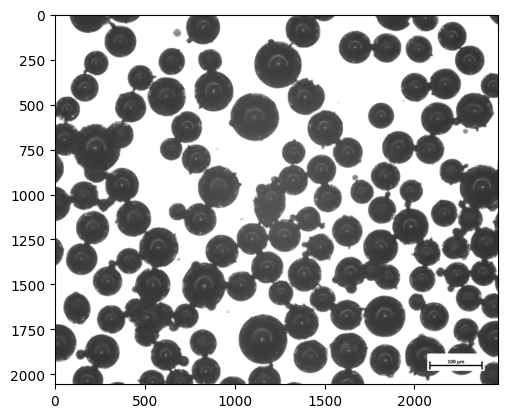

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
 
image = cv2.imread('/Users/sarah/Documents/areospace research/material recycling project/PyImageJ-Particle-Analysis/Particle Images/Ti64_Lot232-EZ2316_1Use_10X_Scale.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
 
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
plt.show()

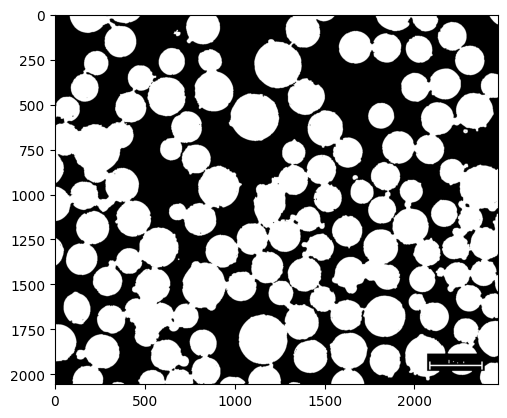

In [2]:
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
 
plt.imshow(cv2.cvtColor(opening, cv2.COLOR_BGR2RGB))
plt.show()

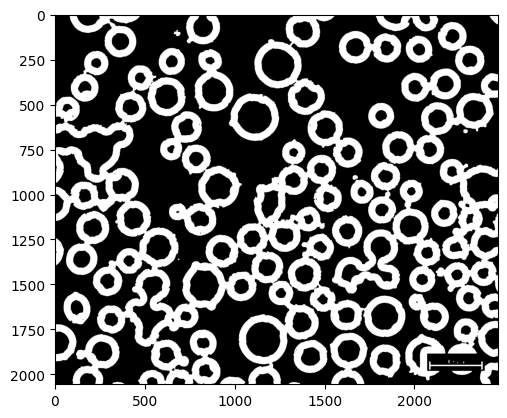

In [3]:
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.3*dist_transform.max(),255,0)
  
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(opening,sure_fg)
 
plt.imshow(cv2.cvtColor(unknown, cv2.COLOR_BGR2RGB))
plt.show()

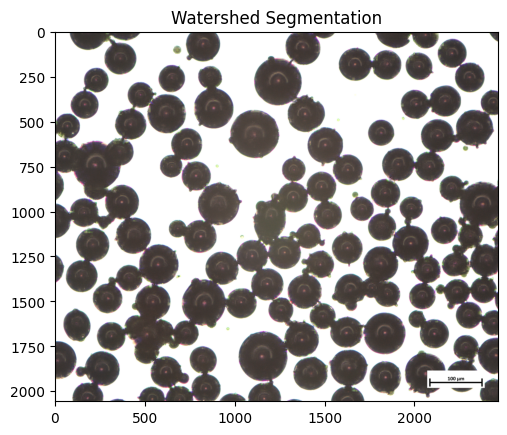

In [5]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
  
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
  
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

 
markers = cv2.watershed(image,markers)


binary_image[markers == -1] = [255, 255, 255]
 
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Watershed Segmentation')
plt.show()

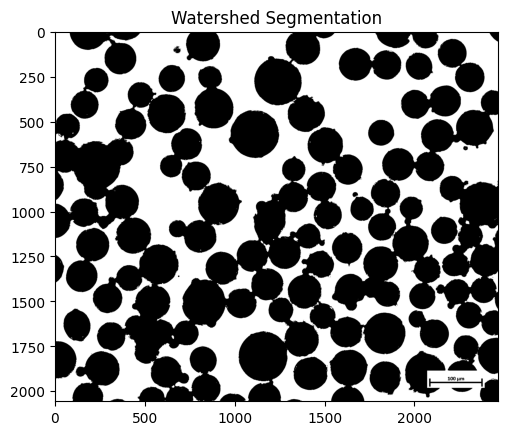

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the image
image = cv2.imread('/Users/sarah/Documents/areospace research/material recycling project/PyImageJ-Particle-Analysis/Particle Images/Ti64_Lot232-EZ2316_1Use_10X_Scale.png')  # Replace with your image path

# Step 2: Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 3: Threshold the image
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Step 4: Remove small noise using morphological operations (optional)
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# Step 5: Sure background area (dilate the opening)
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Step 6: Sure foreground area (distance transform)
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Step 7: Find unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Step 8: Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that the sure background is not 0, but 1
markers = markers + 1

# Mark the unknown region with zero
markers[unknown == 255] = 0

# Step 9: Apply watershed
markers = cv2.watershed(image, markers)

# Step 10: Mark the boundaries
image[markers == -1] = [0, 0, 0]  # Mark watershed boundaries in white

# Step 11: Display the result
plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB))
plt.title('Watershed Segmentation')
plt.show()


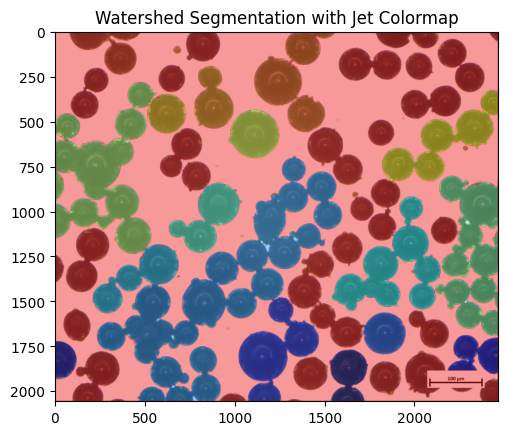

In [9]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
 
img = cv.imread('/Users/sarah/Documents/areospace research/material recycling project/PyImageJ-Particle-Analysis/Particle Images/Ti64_Lot232-EZ2316_1Use_10X_Scale.png')
assert img is not None, "file could not be read, check with os.path.exists()"
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 2)
 
# sure background area
sure_bg = cv.dilate(opening,kernel,iterations=10)
 
# Finding sure foreground area
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
ret, sure_fg = cv.threshold(dist_transform,0.7*dist_transform.max(),255,0)
 
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)

# Marker labelling
ret, markers = cv.connectedComponents(sure_fg)
 
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
 
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

markers = cv.watershed(img,markers)
img[markers == -1] = [0,0,255]

# Step 11: Display the result
normalized_markers = cv.normalize(markers, None, 0, 255, cv.NORM_MINMAX).astype(np.uint8)
colored_markers = cv.applyColorMap(normalized_markers, cv.COLORMAP_JET)

# Overlay the colored markers on the original image
result = cv.addWeighted(cv.cvtColor(img, cv.COLOR_BGR2RGB), 0.6, colored_markers, 0.4, 0)

# Step 14: Display the result with Jet colormap
plt.imshow(result)
plt.title('Watershed Segmentation with Jet Colormap')
plt.show()

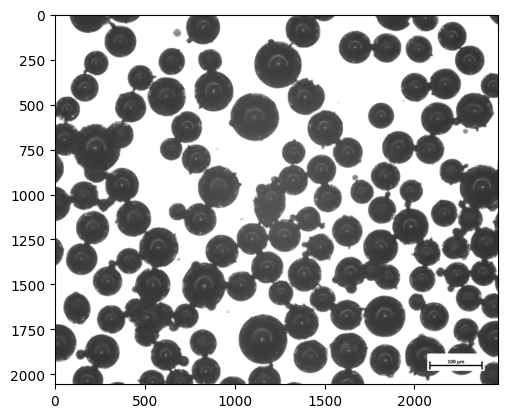

In [3]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
 
image = cv2.imread('/Users/sarah/Documents/areospace research/material recycling project/PyImageJ-Particle-Analysis/Particle Images/Ti64_Lot232-EZ2316_1Use_10X_Scale.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blurred = cv.GaussianBlur(gray, (5, 5), 0)
 
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
plt.show()

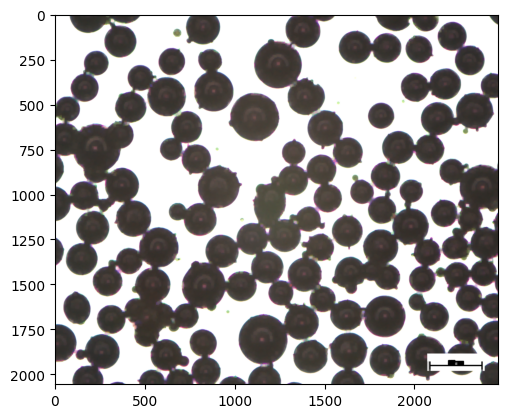

In [5]:
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(image,cv2.MORPH_OPEN,kernel, iterations = 5)
 
plt.imshow(cv2.cvtColor(opening, cv2.COLOR_BGR2RGB))
plt.show()

In [8]:
# sure background area
sure_bg = cv.dilate(opening,kernel,iterations=10)
 
# Finding sure foreground area
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
ret, sure_fg = cv.threshold(dist_transform,0.7*dist_transform.max(),255,0)
 
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(opening,sure_fg)
 
plt.imshow(cv2.cvtColor(unknown, cv2.COLOR_BGR2RGB))
plt.show()

error: OpenCV(4.10.0) /Users/xperience/GHA-Actions-OpenCV/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/distransform.cpp:752: error: (-215:Assertion failed) src.type() == CV_8UC1 in function 'distanceTransform'


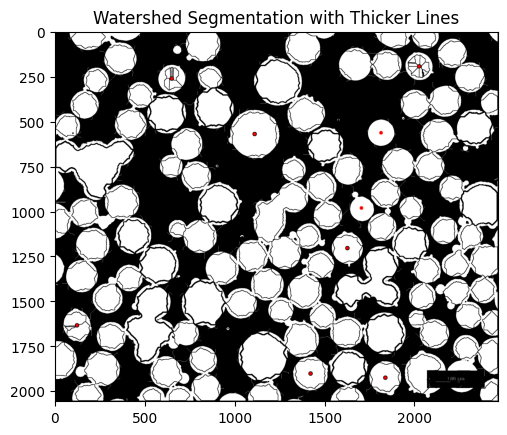

In [51]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers + 1

# Now, mark the region of unknown with zero
markers[unknown == 255] = 0

# Apply watershed
markers = cv2.watershed(image, markers)

# Create a binary image where the watershed lines are set to 255 (white)
watershed_lines = np.zeros_like(markers, dtype=np.uint8)
watershed_lines[markers == -1] = 255

kernel = np.ones((3, 3), np.uint8)  # Adjust the size for thicker lines if needed
dilated_lines = cv.dilate(watershed_lines, kernel, iterations=1)

# Step 14: Mark the thicker boundaries in the original image
image[dilated_lines == 255] = [0, 0, 0]  # Red color for boundary lines

cv.imwrite('/Users/sarah/Documents/areospace research/material recycling project/PyImageJ-Particle-Analysis/Processed Images/Ti64_Lot232-EZ2316_1Use_10X_Scale_processedimage.png', image)

# Step 15: Display the result
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title('Watershed Segmentation with Thicker Lines')
plt.show()

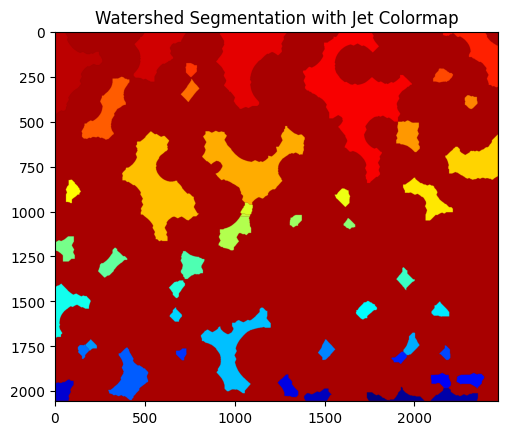

In [40]:
normalized_markers = cv.normalize(markers, None, 0, 255, cv.NORM_MINMAX).astype(np.uint8)
colored_markers = cv.applyColorMap(normalized_markers, cv.COLORMAP_JET)

# Step 14: Display the result with Jet colormap
plt.imshow(colored_markers)
plt.title('Watershed Segmentation with Jet Colormap')
plt.show()

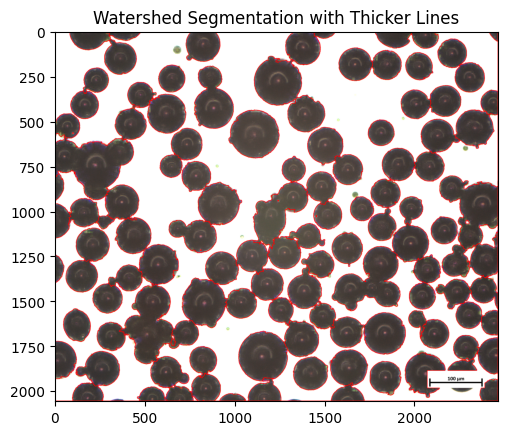

True

In [28]:
image = cv2.imread('/Users/sarah/Documents/areospace research/material recycling project/PyImageJ-Particle-Analysis/Particle Images/Ti64_Lot232-EZ2316_1Use_10X_Scale.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,210,255,cv2.THRESH_BINARY_INV)
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

# Finding sure foreground area
dist_transform = cv.distanceTransform(opening, cv.DIST_L2, 5)
ret, sure_fg = cv.threshold(dist_transform, 0.2 * dist_transform.max(), 255, 0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(opening,sure_fg)

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers + 1

# Now, mark the region of unknown with zero
markers[unknown == 255] = 0

# Apply watershed
markers = cv2.watershed(image, markers)

# Create a binary image where the watershed lines are set to 255 (white)
watershed_lines = np.zeros_like(markers, dtype=np.uint8)
watershed_lines[markers == -1] = 255

kernel = np.ones((3, 3), np.uint8)  # Adjust the size for thicker lines if needed
dilated_lines = cv.dilate(watershed_lines, kernel, iterations=1)

# Step 14: Mark the thicker boundaries in the original image
image[dilated_lines == 255] = [0, 0, 255] 

# Step 15: Display the result
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title('Watershed Segmentation with Thicker Lines')
plt.show()
cv.imwrite('/Users/sarah/Documents/areospace research/material recycling project/PyImageJ-Particle-Analysis/Processed Images/Ti64_Lot232-EZ2316_1Use_10X_Scale_processedimage.png', image)

